In [ ]:
# Changer wdir
import os
import sys
print("Current directory : ", os.getcwd())
print("Add src/ to PYTHONPATH...")
sys.path.insert(0, 'src/')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from preprocessing import ReadTweet, PreprocessingText

FILEPATH = "data/eit_annot_100_1899.txt"
# Get tweets
X, y = ReadTweet(FILEPATH).get_data()
labels = {'pos': 0, 'neg': 1, 'neu': 2, 'irr': 3, '???' : 3}
y = np.array(list(map(lambda k: labels[k], y)))

# Déséquilibre entre les catégories

In [ ]:
nb_categories = np.zeros((4,))
for v in y:
    nb_categories[v] = nb_categories[v] + 1

plt.pie(nb_categories, labels=['pos', 'neg', 'neu', 'irr'], autopct="%1.1f%%", startangle=90)
plt.title("Partition des catégories")

On peut voir qu'il y a un déséquilibre entre [pos, neg] et [neu, irr] => Besoin de s'adapter à ce déséquilibrage :
* ne pas utiliser tf-idf car c'est pas bon pour le modele :(


# Fréquences des mots

In [ ]:
preprocessing = PreprocessingText()

X_pp = preprocessing.fit_transform(X)

In [ ]:
frequences = pd.Series(''.join(X_pp).split()).value_counts()

fig, ax = plt.subplots()
frequences.plot(kind='line', ax=ax, rot=90,)
fig.show()

On veut bien supprimer les mots les moins apparus car ils peuvent rajouter des bruits dans l'algorithme

Size before :  7351
Size After :  316


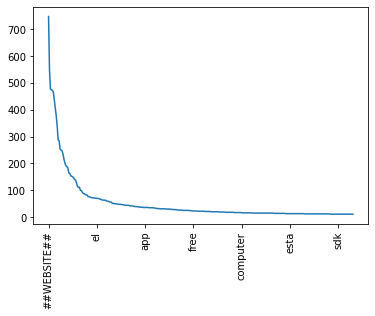

In [12]:
frequences_rm = frequences[frequences > 10]

fig, ax = plt.subplots()
frequences_rm.plot(kind='line', ax=ax, rot=90,)
fig.show()

print("Size before : ", len(frequences))
print("Size After : ", len(frequences_rm))

In [21]:
rm_tokens = pd.Series(X_pp).apply(lambda x : " ".join(x for x in x.split() if x not in list(frequences_rm.index)))
print(list(frequences_rm.index))

['##WEBSITE##', '.', '#google', ',', '#microsoft', ':', '#twitter', 'the', '@apple', 'to', 'a', 'i', 'is', 'rt', '-', '!', 'on', 'and', 'for', '#android', 'de', "'", 's', 'in', 'of', '?', '...', 'it', 'my', 'you', 'me', 'en', 'not', 'with', 'new', '4', 'at', 'no', 'nexus', '&', 'iphone', 'that', 'que', 'y', 'sandwich', 'galaxy', 'google', 'android', 'cream', 'ice', 'el', 'do', '#samsung', 'microsoft', 'la', 'have', 'your', '(', 'via', 'this', 'phone', 'so', '""', 'just', 'out', 'get', 'o', 'are', 'be', '#facebook', 'all', 'like', '#apple', 'now', 'un', 'windows', 'ballmer', 'am', 'an', '/', 'what', '..', '5', 'but', 'steve', '!!', 'from', '2', 'store', 'up', 'd', 'can', 'how', 'off', '4.0', 'has', 'if', 'by', '+', '7', 'app', '#icecreamsandwich', ';', 'es', '#ios', '#', 'more', '#iphone', 'about', 'when', '3', 'video', 'con', 'will', 'one', 'love', 'they', 'q', '1', 'para', 'twitter', 'time', 'u', 'or', '#ics', 'se', 'siri', '#nexusprime', '#galaxynexus', '8', 'its', 'was', 'e', '#nexu